In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
df=pd.read_csv('data/churn_prediction.csv', low_memory=False)
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [3]:
df.shape

(28382, 21)

In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,28372,28373,28374,28375,28376,28377,28378,28379,28380,28381
customer_id,1,2,4,5,6,7,8,9,10,11,...,30292,30293,30294,30295,30296,30297,30298,30299,30300,30301
vintage,3135,310,2356,478,2531,263,5922,1145,2132,3379,...,2161,2384,658,2041,2155,1845,4919,297,2585,2349
age,66,35,31,90,42,42,72,46,31,40,...,49,73,55,42,85,10,34,47,50,18
gender,Male,Male,Male,NaN,Male,Female,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Female,Female,Male,Male,Male
dependents,0,0,0,NaN,2,0,0,0,0,3,...,1,0,0,0,0,0,0,0,3,0
occupation,self_employed,self_employed,salaried,self_employed,self_employed,self_employed,retired,self_employed,salaried,self_employed,...,self_employed,retired,salaried,self_employed,retired,student,self_employed,salaried,self_employed,student
city,187,NaN,146,1020,1494,1096,1020,623,1096,1020,...,1320,1381,1076,146,1589,1020,1046,1096,1219,1232
customer_nw_category,2,2,2,2,3,2,1,2,2,2,...,3,3,3,2,2,2,2,2,3,2
branch_code,755,3214,41,582,388,1666,1,317,4110,38,...,1347,790,463,286,389,1207,223,588,274,474
days_since_last_transaction,224,60,NaN,147,58,60,98,172,19,0,...,25,3,306,57,NaN,70,14,0,NaN,59


In [6]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [7]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [9]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [10]:
df.nunique()

customer_id                       28382
vintage                            5473
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1604
customer_nw_category                  3
branch_code                        3185
days_since_last_transaction         360
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
dtype: int64

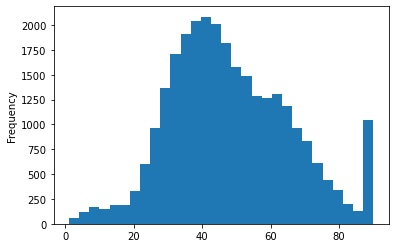

In [24]:
df['age'].plot.hist(bins=30)

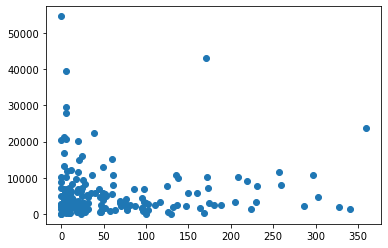

In [23]:
plt.scatter(df['days_since_last_transaction'][:200], df['current_balance'][:200])

In [22]:
pd.DataFrame({'days':df['days_since_last_transaction'][:100], 'bal':df['current_balance'][:100]})

,days,bal
0,224.0,1458.71
1,60.0,5390.37
2,NaN,3913.16
3,147.0,2291.91
4,58.0,927.72
...,...,...
95,30.0,1454.24
96,180.0,2429.18
97,NaN,2460.94
98,39.0,22437.57


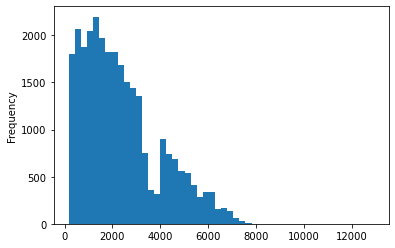

In [30]:
df.vintage.plot.hist(bins=50)

In [26]:
df['vintage']

0        3135
1         310
2        2356
3         478
4        2531
         ... 
28377    1845
28378    4919
28379     297
28380    2585
28381    2349
Name: vintage, Length: 28382, dtype: int64

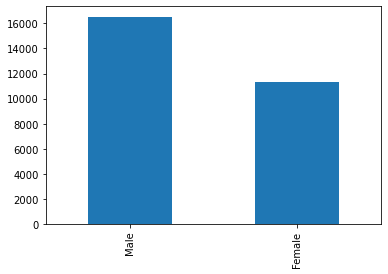

In [32]:
df['gender'].value_counts().plot.bar()

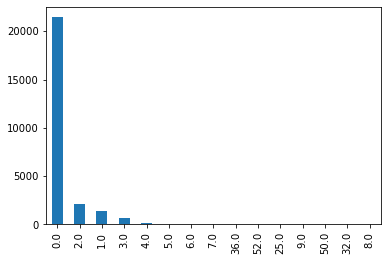

In [36]:
df['dependents'].value_counts().plot.bar()

In [37]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

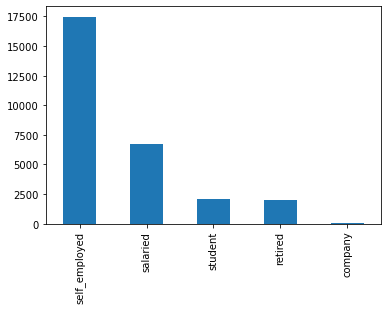

In [39]:
df['occupation'].value_counts().plot.bar()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

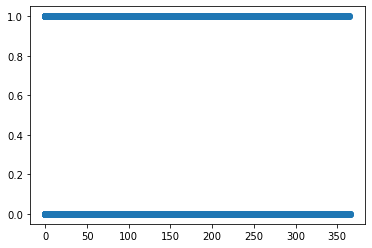

In [49]:
plt.scatter(df['days_since_last_transaction'], df['churn'])

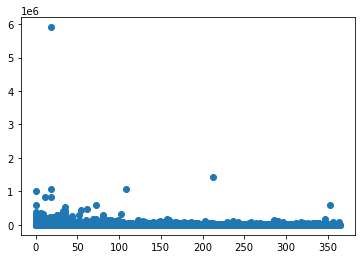

In [54]:
plt.scatter(df['days_since_last_transaction'], df['current_balance'])

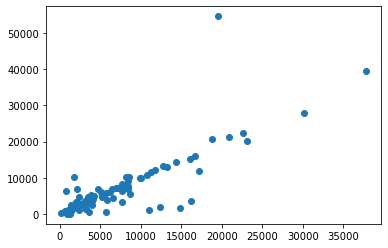

In [58]:
plt.scatter(df['previous_month_end_balance'][:100], df['current_balance'][:100])

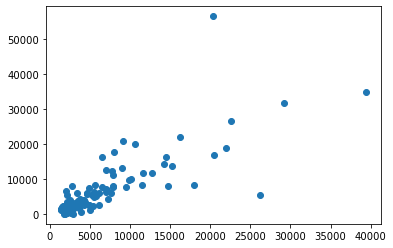

In [61]:
plt.scatter(df['average_monthly_balance_prevQ'][:100], df['average_monthly_balance_prevQ2'][:100])

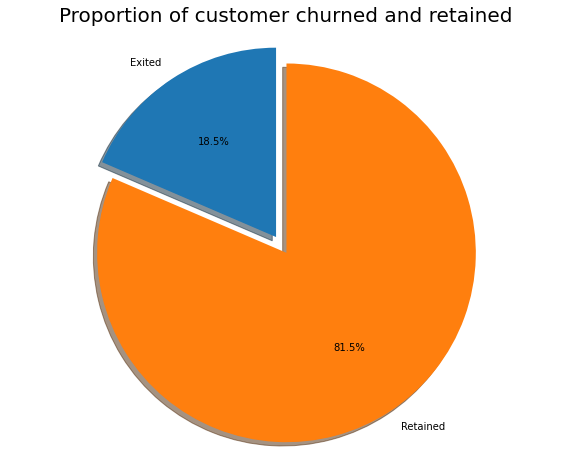

In [63]:
labels = 'Exited', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [72]:
df.churn.value_counts()/len(df.churn)

0    0.814671
1    0.185329
Name: churn, dtype: float64

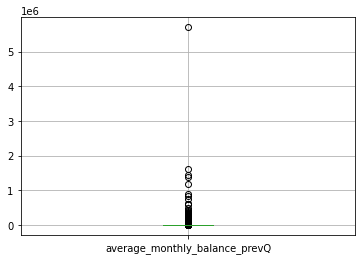

In [79]:
df[['gender', 'average_monthly_balance_prevQ']].boxplot()

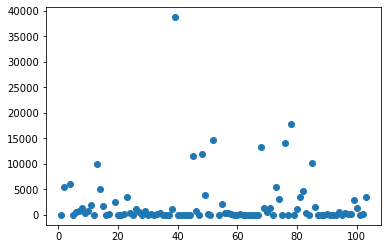

In [82]:
plt.scatter(df['customer_id'][:100], df['current_month_debit'][:100])

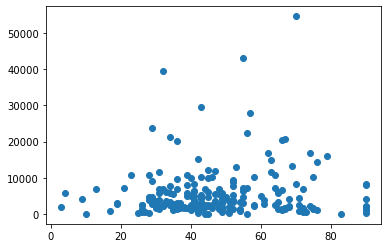

In [86]:
plt.scatter(df['age'][:200], df['current_balance'][:200])

In [87]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [88]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [89]:
df_tmp=df.copy()

In [90]:
df_tmp.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [92]:
df_tmp.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [93]:
df['gender'].fillna(value=(df['gender'].mode()[0]), inplace=True)

In [96]:
df['dependents'].fillna(value=(df['dependents'].mean()), inplace=True)

In [97]:
df['occupation'].fillna(value=(df['occupation'].mode()[0]), inplace=True)

In [98]:
df['city'].fillna(value=(df['city'].mode()[0]), inplace=True)

In [99]:
df['customer_nw_category'].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

In [100]:
df['customer_nw_category'].fillna(value=(df['customer_nw_category'].mean()), inplace=True)

In [101]:
df['days_since_last_transaction'].fillna(value=(df['days_since_last_transaction'].mean()), inplace=True)

In [102]:
df.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [103]:
df_tmp2=df_tmp.copy()

In [104]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

dependents
city
days_since_last_transaction


In [105]:
df_tmp.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [106]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            df_tmp[label+'_is_missing']=pd.isnull(content)
            df_tmp[label]=content.fillna(content.mean())

In [107]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

In [108]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

gender
occupation


In [113]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype('category').cat.as_ordered()
        df_tmp[label+'_is_missing']=pd.isnull(content)
        df_tmp[label]=content.fillna(content.mode()[0])

In [114]:
df_tmp['gender'].head(7)

0      Male
1      Male
2      Male
3      Male
4      Male
5    Female
6      Male
Name: gender, dtype: category
Categories (2, object): [Female < Male]

In [115]:
df_tmp.dtypes

customer_id                                  int64
vintage                                      int64
age                                          int64
gender                                    category
dependents                                 float64
occupation                                category
city                                       float64
customer_nw_category                         int64
branch_code                                  int64
days_since_last_transaction                float64
current_balance                            float64
previous_month_end_balance                 float64
average_monthly_balance_prevQ              float64
average_monthly_balance_prevQ2             float64
current_month_credit                       float64
previous_month_credit                      float64
current_month_debit                        float64
previous_month_debit                       float64
current_month_balance                      float64
previous_month_balance         

In [116]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label]=pd.Categorical(content).codes+1

In [117]:
df_tmp.dtypes

customer_id                                 int64
vintage                                     int64
age                                         int64
gender                                       int8
dependents                                float64
occupation                                   int8
city                                      float64
customer_nw_category                        int64
branch_code                                 int64
days_since_last_transaction               float64
current_balance                           float64
previous_month_end_balance                float64
average_monthly_balance_prevQ             float64
average_monthly_balance_prevQ2            float64
current_month_credit                      float64
previous_month_credit                     float64
current_month_debit                       float64
previous_month_debit                      float64
current_month_balance                     float64
previous_month_balance                    float64


In [118]:
df_tmp.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,dependents_is_missing,city_is_missing,days_since_last_transaction_is_missing,gender_is_missing,occupation_is_missing
0,1,3135,66,2,0.000000,4,187.000000,2,755,224.000000,...,0.20,0.20,1458.71,1458.71,0,False,False,False,False,False
1,2,310,35,2,0.000000,4,796.109576,2,3214,60.000000,...,5486.27,100.56,6496.78,8787.61,0,False,True,False,False,False
2,4,2356,31,2,0.000000,3,146.000000,2,41,69.997814,...,6046.73,259.23,5006.28,5070.14,0,False,False,True,False,False
3,5,478,90,2,0.347236,4,1020.000000,2,582,147.000000,...,0.47,2143.33,2291.91,1669.79,1,True,False,False,True,False
4,6,2531,42,2,2.000000,4,1494.000000,3,388,58.000000,...,588.62,1538.06,1157.15,1677.16,1,False,False,False,False,False


In [119]:
df_tmp.shape

(28382, 26)

In [120]:
df_tmp.isna().sum()

customer_id                               0
vintage                                   0
age                                       0
gender                                    0
dependents                                0
occupation                                0
city                                      0
customer_nw_category                      0
branch_code                               0
days_since_last_transaction               0
current_balance                           0
previous_month_end_balance                0
average_monthly_balance_prevQ             0
average_monthly_balance_prevQ2            0
current_month_credit                      0
previous_month_credit                     0
current_month_debit                       0
previous_month_debit                      0
current_month_balance                     0
previous_month_balance                    0
churn                                     0
dependents_is_missing                     0
city_is_missing                 

In [126]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

customer_id
vintage
age
gender
dependents
occupation
city
customer_nw_category
branch_code
days_since_last_transaction
current_balance
previous_month_end_balance
average_monthly_balance_prevQ
average_monthly_balance_prevQ2
current_month_credit
previous_month_credit
current_month_debit
previous_month_debit
current_month_balance
previous_month_balance
churn
dependents_is_missing
city_is_missing
days_since_last_transaction_is_missing
gender_is_missing
occupation_is_missing


In [127]:
df_tmp.to_csv('data/cleaned_data', index=False)

In [129]:
df_tmp.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,dependents_is_missing,city_is_missing,days_since_last_transaction_is_missing,gender_is_missing,occupation_is_missing
0,1,3135,66,2,0.000000,4,187.000000,2,755,224.000000,...,0.20,0.20,1458.71,1458.71,0,False,False,False,False,False
1,2,310,35,2,0.000000,4,796.109576,2,3214,60.000000,...,5486.27,100.56,6496.78,8787.61,0,False,True,False,False,False
2,4,2356,31,2,0.000000,3,146.000000,2,41,69.997814,...,6046.73,259.23,5006.28,5070.14,0,False,False,True,False,False
3,5,478,90,2,0.347236,4,1020.000000,2,582,147.000000,...,0.47,2143.33,2291.91,1669.79,1,True,False,False,True,False
4,6,2531,42,2,2.000000,4,1494.000000,3,388,58.000000,...,588.62,1538.06,1157.15,1677.16,1,False,False,False,False,False


In [130]:
x=df_tmp.drop(['churn'], axis=1)
y=df['churn']

In [131]:
x.shape, y.shape

((28382, 25), (28382,))

In [132]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val=train_test_split(x, y, stratify=y, random_state=42, test_size=0.2)

In [133]:
x_train.shape, x_val.shape

((22705, 25), (5677, 25))

In [134]:
y_train.value_counts()/len(y_train)

0    0.814666
1    0.185334
Name: churn, dtype: float64

In [135]:
y_val.value_counts()/len(y_val)

0    0.814691
1    0.185309
Name: churn, dtype: float64

In [136]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [140]:
lr.fit(x_train, y_train)
lr.predict(x_val)

C:\Users\user\Desktop\ML-course\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [204]:
score1=lr.score(x_val, y_val)
score1

0.8226175797075921

In [203]:
lr.score(x_train, y_train)

0.82651398370403

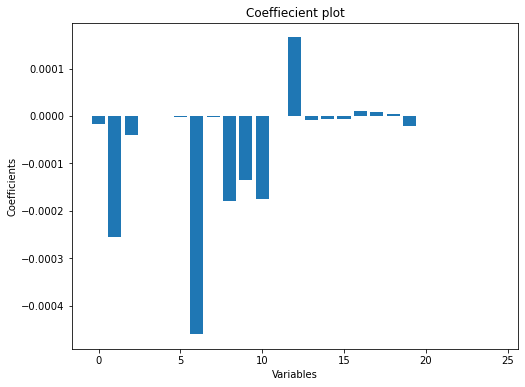

In [145]:
plt.figure(figsize=(8,6), facecolor='w', edgecolor='b')
x1=range(len(x_train.columns))
y1=lr.coef_.reshape(-1)
plt.bar(x1,y1)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coeffiecient plot');

In [146]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [147]:
model.score(x_train, y_train)

0.999955956837701

In [205]:
score2=model.score(x_val, y_val)
score2

0.8645411308789854

In [153]:
score=[]
for i in range(2,20):
    model2=RandomForestClassifier(max_depth=i)
    model2.fit(x_train, y_train)
    k=model2.score(x_val, y_val)
    score.append(k)

In [155]:
data=pd.DataFrame({'md':range(2,20), 'score':score})
data

,md,score
0,2,0.834948
1,3,0.843227
2,4,0.852035
3,5,0.852739
4,6,0.855381
5,7,0.857495
6,8,0.859081
7,9,0.859433
8,10,0.861723
9,11,0.861723


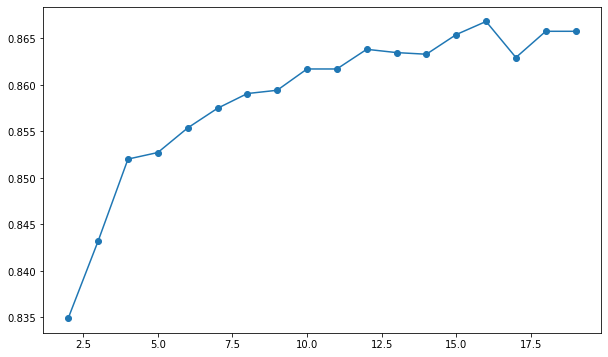

In [156]:
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(data['md'], data['score'], marker='o')

In [157]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid={'n_estimators': np.arange(100,200,10),
        'max_depth': [15,16,19],
        'min_samples_split': np.arange(2,20,2),
        'min_samples_leaf':np.arange(1,20,2),
        'max_features': [0.5,1,'sqrt', 'auto'],
        'max_leaf_nodes':np.arange(15,25,3),
        'max_samples': [10000]}

rs_model=RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,
                                                  random_state=42),
                           param_distributions=rf_grid,
                           n_iter=2,
                           cv=5,
                           verbose=True)

rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.9s finished


Wall time: 23.8 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [15, 16, 19],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_leaf_nodes': array([15, 18, 21, 24]),
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])},
                   verbose=True)

In [158]:
rs_model.best_params_

{'n_estimators': 110,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_leaf_nodes': 24,
 'max_features': 0.5,
 'max_depth': 15}

In [159]:
%%time

model3=RandomForestClassifier(n_estimators=110,
                             n_jobs=-1,
                             min_samples_leaf=5,
                             min_samples_split=18,
                             max_leaf_nodes=24,
                             max_features=0.5,
                             max_depth=15,
                             random_state=42)

model3.fit(x_train, y_train)

Wall time: 3.05 s


RandomForestClassifier(max_depth=15, max_features=0.5, max_leaf_nodes=24,
                       min_samples_leaf=5, min_samples_split=18,
                       n_estimators=110, n_jobs=-1, random_state=42)

In [160]:
model3.score(x_train, y_train)

0.8650077075534023

In [206]:
score3=model3.score(x_val, y_val)
score3

0.8629557865069579

In [162]:
model3.feature_importances_

array([3.31349671e-04, 6.19519020e-03, 6.54759654e-04, 0.00000000e+00,
       0.00000000e+00, 6.46063405e-05, 2.03165672e-04, 6.44775636e-04,
       1.84361125e-03, 4.42931748e-03, 5.42903088e-01, 1.97443297e-02,
       4.99686730e-02, 2.28211869e-02, 9.49926164e-03, 1.05381081e-02,
       1.07430795e-01, 4.24151672e-02, 1.38059542e-01, 4.21400678e-02,
       0.00000000e+00, 0.00000000e+00, 1.13004425e-04, 0.00000000e+00,
       0.00000000e+00])

In [172]:
def plot_features(columns, importances, n=25):
    df=(pd.DataFrame({'features': columns,
                     'feature_importances': importances})
        .sort_values('feature_importances', ascending=False)
        .reset_index(drop=True))
    
    fig, ax=plt.subplots(figsize=(10,10))
    ax.barh(df['features'][:n], df['feature_importances'][:25])
    ax.set_xlabel('Feature Importances')
    ax.set_ylabel('Features')
    ax.invert_yaxis()

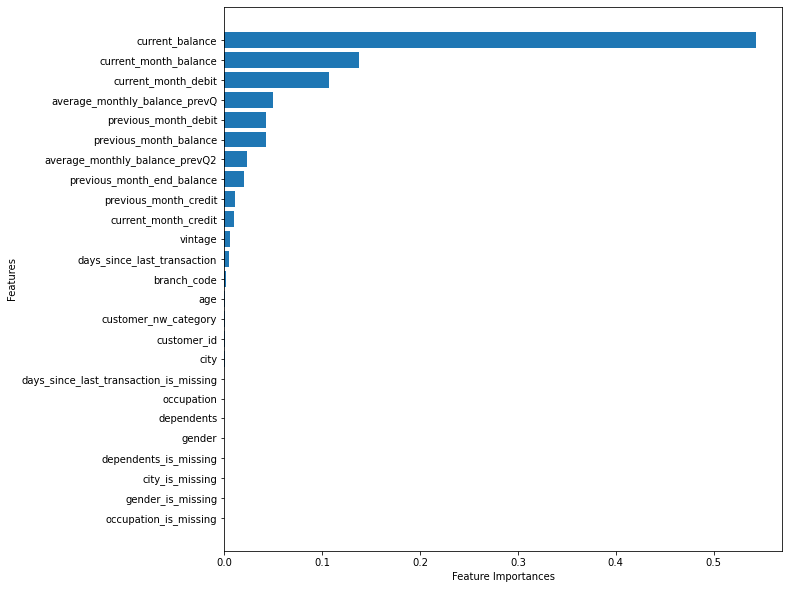

In [173]:
plot_features(x_train.columns, model3.feature_importances_)

In [171]:
x_train.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance',
       'dependents_is_missing', 'city_is_missing',
       'days_since_last_transaction_is_missing', 'gender_is_missing',
       'occupation_is_missing'],
      dtype='object')

In [174]:
from sklearn.model_selection import cross_val_score

In [175]:
score=cross_val_score(model3, x_val, y_val)

In [177]:
score.mean()

0.8580224297325805

In [178]:
from sklearn.metrics import classification_report

In [179]:
y_pred=model3.predict(x_val)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [181]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4625
           1       0.74      0.40      0.52      1052

    accuracy                           0.86      5677
   macro avg       0.81      0.68      0.72      5677
weighted avg       0.85      0.86      0.85      5677



In [182]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[4480,  145],
       [ 633,  419]], dtype=int64)

In [183]:
from sklearn.metrics import plot_confusion_matrix

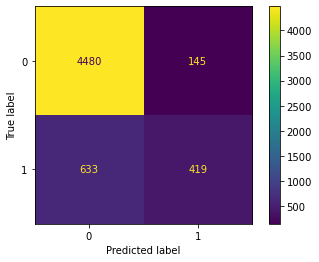

In [185]:
plot_confusion_matrix(model3, x_val, y_val);

In [189]:
frame=df_tmp[['current_balance', 'current_month_balance', 'current_month_debit', 'average_monthly_balance_prevQ', 'previous_month_debit', 'previous_month_balance', 'average_monthly_balance_prevQ2', 'previous_month_end_balance', 'previous_month_credit', 'current_month_credit', 'vintage', 'days_since_last_transaction', 'branch_code', 'age', 'churn']]

In [190]:
frame.head()

,current_balance,current_month_balance,current_month_debit,average_monthly_balance_prevQ,previous_month_debit,previous_month_balance,average_monthly_balance_prevQ2,previous_month_end_balance,previous_month_credit,current_month_credit,vintage,days_since_last_transaction,branch_code,age,churn
0,1458.71,1458.71,0.20,1458.71,0.20,1458.71,1449.07,1458.71,0.20,0.20,3135,224.000000,755,66,0
1,5390.37,6496.78,5486.27,7799.26,100.56,8787.61,12419.41,8704.66,0.56,0.56,310,60.000000,3214,35,0
2,3913.16,5006.28,6046.73,4910.17,259.23,5070.14,2815.94,5815.29,0.61,0.61,2356,69.997814,41,31,0
3,2291.91,2291.91,0.47,2084.54,2143.33,1669.79,1006.54,2291.91,0.47,0.47,478,147.000000,582,90,1
4,927.72,1157.15,588.62,1643.31,1538.06,1677.16,1871.12,1401.72,714.61,0.33,2531,58.000000,388,42,1


In [191]:
x1=frame.drop(['churn'], axis=1)
y1=frame['churn']

In [192]:
x1_train, x1_val, y1_train, y1_val=train_test_split(x1,y1, test_size=0.2, random_state=42, stratify=y)

In [193]:
%%time

model4=RandomForestClassifier(n_estimators=110,
                             n_jobs=-1,
                             min_samples_leaf=5,
                             min_samples_split=18,
                             max_leaf_nodes=24,
                             max_features=0.5,
                             max_depth=15,
                             random_state=42)

model4.fit(x1_train, y1_train)

Wall time: 2.66 s


RandomForestClassifier(max_depth=15, max_features=0.5, max_leaf_nodes=24,
                       min_samples_leaf=5, min_samples_split=18,
                       n_estimators=110, n_jobs=-1, random_state=42)

In [194]:
model4.score(x1_train, y1_train)

0.8660647434485796

In [207]:
score4=model4.score(x1_val, y1_val)
score4

0.8629557865069579

In [196]:
model3.score(x_val, y_val)

0.8629557865069579

In [197]:
from sklearn.metrics import roc_auc_score

In [231]:
pred_probs=model4.predict_proba(x1_val)[:,1]

In [200]:
roc_auc_score(y1_val, pred_probs[:,1])

0.8359227212002877

In [214]:
results_df = pd.DataFrame({'logistic':a, 'Random': b, 'random-best': c, 'random-imp-features': d})

In [213]:
a=[]
b=[]
c=[]
d=[]
a.append(score1)
b.append(score2)
c.append(score3)
d.append(score4)

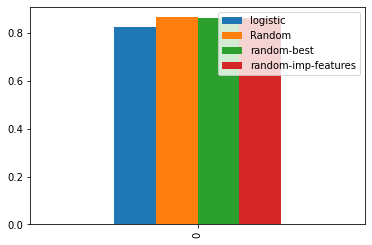

In [228]:
results_df.plot(y=["logistic", "Random", "random-best", "random-imp-features"], kind="bar")

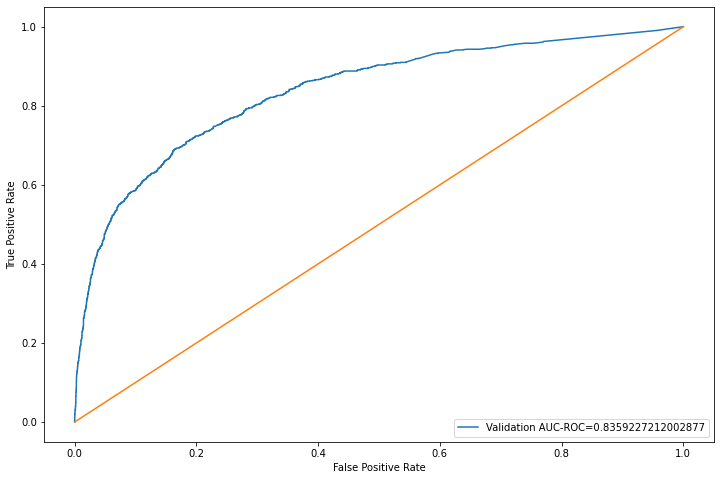

In [232]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y1_val,pred_probs) 
auc = roc_auc_score(y1_val, pred_probs) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()